<a href="https://colab.research.google.com/github/U-ohata/Rabbit_Report_2/blob/Rabbit_Report_Colaboratory/NN_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

入力層～中間層

確認テスト1

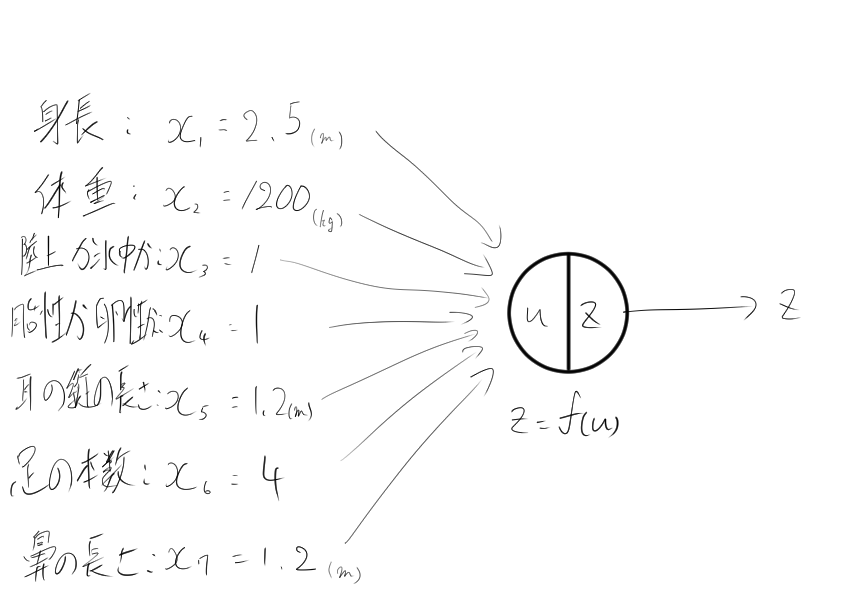

確認テスト2
この数式(u = Wx + b, W = [w1,w2,…1,wn]^t, X = [x1,x2,…1,xn]^t)をpythonで書け

In [ ]:
#numpyインポート
import numpy as np

In [ ]:
#各ベクトル宣言
#重み
W = [2,7,4,3]
#入力値
X = [1,2,3,4]
#バイアス
b = -10
#総入力(Answer)
u = np.dot(W,X)+b
print(u)

30


確認テスト3
1-1のファイルから中間層の出力を定義しているソースを抜き出せ

In [ ]:
    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 2層の総出力
    z2 = functions.relu(u2)

#1つ目は中間層の出力値、２つ目は中間層の出力値に活性化関数を用いて値を変えたもの

活性化関数

確認テスト 線形と非線形の違いを図に書いて簡易に説明せよ

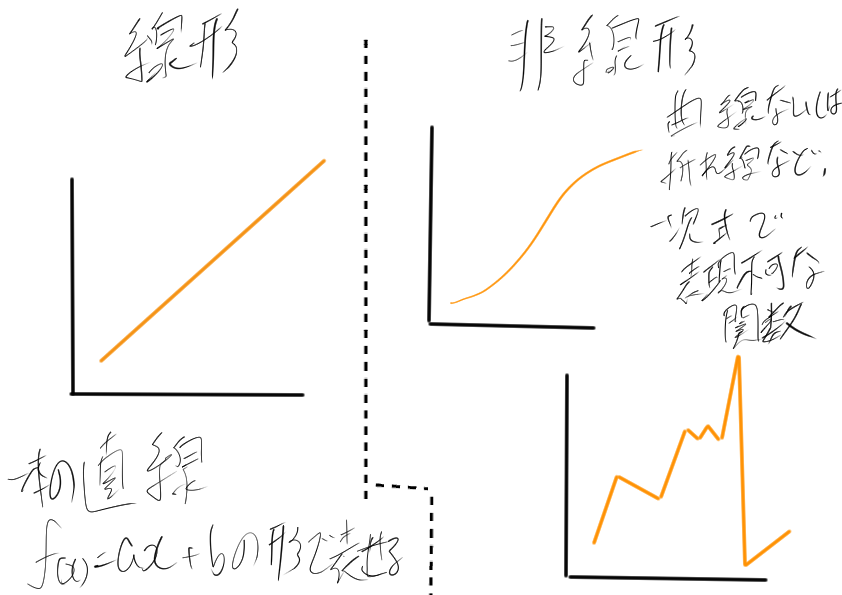

線形：１本の直線　f(x) = ax+bの形で表せる
非線形：曲線ないしは折れ線など、一時式で表現不可能な関数

確認テスト 配布されたソースコードより該当する箇所を抜き出せ

In [ ]:
# 中間層出力
z = functions.sigmoid(u)

出力層

確認テスト

①なぜ引き算でなく２乗するか述べよ

正負による互いの打ち消しあいを避けるため

②下式の1/2はどういう意味を持つか述べよ

yで微分したらy-dになるから

In [ ]:
#ステップ関数
def step_functuion(x):
  #閾値0として設定
  if x > 0:
    return 1
  else:
    return 0

In [ ]:
#シグモイド関数
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
#ReLU関数
def ReLU(x):
  if x > 0:
    return x
  else:
    return 0

確認テスト ①～③の数式に該当するソースコードを示し、１行ずつ処理の説明をせよ

In [ ]:
#ソフトマックス関数
#①部分 x = (u_0, u_1, …)として代入することで、f(i,u)の値を各iについて得ることができる
def softmax(x):
  if x.ndim == 2:
    x = x.T
    x = x - np.max(x,axis = 0)
    #②③部分
    #② np.exp(x)でそれぞれのiについてeのu_i乗を示している。
    #③ np.sum(np.exp(x))で③部分を表している。 np.sum(X)で、Xの要素の合計を示していて、X部分で(②参照)各iについてu_iのベクトルを保持しているので、それらの合計を示す。
    y = np.exp(x)/np.sum(np.exp(x),axis = 0)
    return y.T
  x = x - np.max(x)
  #②③部分
  #② np.exp(x)でそれぞれのiについてeのu_i乗を示している。
  #③ np.sum(np.exp(x))で③部分を表している。 np.sum(X)で、Xの要素の合計を示していて、X部分で(②参照)各iについてu_iのベクトルを保持しているので、それらの合計を示す。
  return np.exp(x)/np.sum(np.exp(x))

確認テスト ①～②の数式に該当するソースコードを示し、１行ずつ処理の説明をせよ

In [ ]:
#交差エントロピー
#①部分 数式では引数として重みwが入力されているが、0か1の出力yを使用して更新を行う(yの要素内に1は１つのみ、他は0)
def cross_entropy_error(d,y):
  #次元数確認 yが1次元(ベクトル)のみ実行
  if y.ndim == 1:
    #1行dのサイズ列の行列に変更
    d = d.reshape(1,d.size)
    #1行yのサイズ列の行列に変更
    y = y.reshape(1,y.size)
    #yとdの要素数が同一であれば実行
    if d.size == y.size:
      #ベクトル要素の最大値の番号を取得
      d = d.argmax(axis = 1)
      #yの行数をバッチサイズとして代入
      batch_size = y.shape[0]
  #②部分 yが1となる部分と同じ場所のdを用いたlog(d)しか計算しない
  #log(0)回避のため1e-7付与
  return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7))/batch_size

勾配降下法

確認テスト 該当するソースコードを探してみよう

W(t+1) = W(t) - ε∇Eの部分

In [ ]:
# パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

∇E部分

In [ ]:
grad = backward(x, d, z1, y)

backward関数内で各パラメータの更新量を決定している

In [ ]:
# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    # print_vec("偏微分_重み1", grad["W1"])
    # print_vec("偏微分_重み2", grad["W2"])
    # print_vec("偏微分_バイアス1", grad["b1"])
    # print_vec("偏微分_バイアス2", grad["b2"])

    return grad

確認テスト オンライン学習とは何か

1度にデータを取得して学習する方法とは異なり、逐次取得するデータを用いて随時パラメータを更新していく学習方法のこと

確認テスト この数式( W(t+1) = W(t) - ε∇E_t )の意味を図に書いて説明せよ

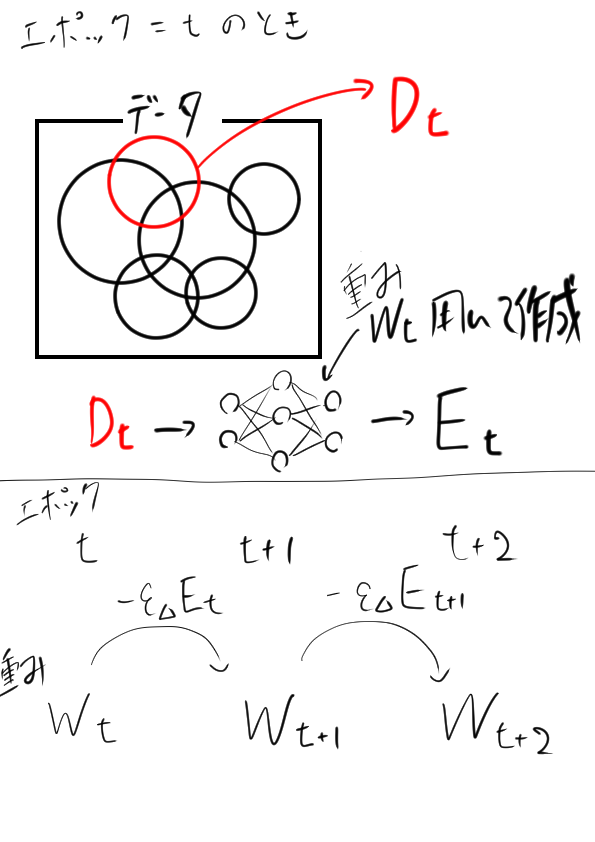

誤差逆伝播法

確認テスト 誤差逆伝播法では不要な再帰的処理を避けることができる。既に行った計算結果を保持しているソースコードを抽出せよ。

In [ ]:
# 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)

勾配降下の繰り返しで以前のパラメータを再度使用することで再帰的処理を避けている

In [ ]:
# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)

確認テスト 2つの空欄に該当するソースコードを探せ

δE/δy * δy/δu

In [ ]:
 # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)

順伝播部分で恒等写像で作成しているため、微分は1となり、計算箇所が存在しない。つまりδE/δy * δy/δu = δE/δy * 1 = δE/δy

In [ ]:
# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    
    ## 試してみよう
    #z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    #恒等写像
    y = u2

δE/δy \* δy/δu \* δu / δw_ji

In [ ]:
# W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)

δE/δy * δy/δuの各項に対して、δu / δw_jiであるz1をかけている。